In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree


In [55]:
data = pd.read_csv("train.csv")

In [53]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


In [44]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    int64  
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 69.5 KB


In [60]:
gender = {"male":1,"female":0}

In [61]:
data["Sex"] = data["Sex"].map(gender)

In [56]:
data["Age"].fillna(data["Age"].mean(),inplace= True)

In [57]:
data.drop(["Name","Cabin","Ticket"],inplace=True,axis=1)

In [95]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [58]:
data.dropna(inplace = True)

In [63]:
data["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [65]:
embark = {"S":0,"C":1,"Q":2}

In [66]:
data["Embarked"] = data["Embarked"].map(embark)

In [69]:
x = data.drop("Survived",axis = 1)
y = data["Survived"]

In [70]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,train_size = 90)

In [71]:
Gini = DecisionTreeClassifier(criterion="gini",max_depth=5,max_leaf_nodes=5)

In [72]:
Gini.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=5)

In [73]:
y_pred = Gini.predict(xtest)

In [76]:
accuracy_score(ytest,y_pred)

0.8022528160200251

In [78]:
Gini.score(xtrain,ytrain)

0.8222222222222222

In [79]:
Gini.score(xtest,ytest)

0.8022528160200251

[Text(0.5, 0.875, 'X[2] <= 0.5\ngini = 0.494\nsamples = 90\nvalue = [50, 40]'),
 Text(0.25, 0.625, 'X[1] <= 2.5\ngini = 0.291\nsamples = 34\nvalue = [6, 28]'),
 Text(0.125, 0.375, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]'),
 Text(0.375, 0.375, 'X[0] <= 389.5\ngini = 0.457\nsamples = 17\nvalue = [6, 11]'),
 Text(0.25, 0.125, 'gini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.5, 0.125, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.75, 0.625, 'X[6] <= 26.144\ngini = 0.337\nsamples = 56\nvalue = [44, 12]'),
 Text(0.625, 0.375, 'gini = 0.26\nsamples = 39\nvalue = [33, 6]'),
 Text(0.875, 0.375, 'gini = 0.457\nsamples = 17\nvalue = [11, 6]')]

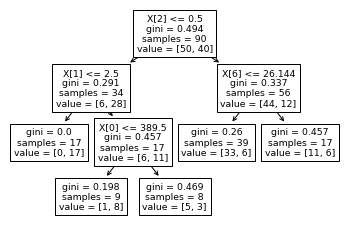

In [80]:
tree.plot_tree(Gini.fit(xtrain,ytrain))

In [105]:
test = pd.read_csv("test.csv")

In [106]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [113]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
 7   Embarked     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [107]:
test.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)

In [108]:
test["Age"].fillna(test["Age"].mean(),inplace=True)

In [109]:
test["Fare"].fillna(test["Fare"].mean(),inplace=True)

In [110]:
test.columns

Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [111]:
test["Embarked"]=test["Embarked"].map({"S":0,"C":1,"Q":2})


In [112]:
test["Sex"]=test["Sex"].map({"male":1,"female":0})

In [114]:
Gini.predict(test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,